# Constants

In [40]:
import matplotlib
import matplotlib.pyplot as plt


medium_figsize = (8,6)


cmap = matplotlib.cm.viridis

words_color = [0,1,1]

# Tokens

##### Imports

In [37]:
# Python standard library
import io
import re
import sys



# Scientific computing
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


# Google cloud
from google.cloud import vision
from google.cloud.vision import types


# Shelfie
sys.path.append('..')
import main

sys.path.append('../models')
import book_functions
import image_processing


##### Get data

In [38]:
img_path = main.SHELFY_BASE_PATH + '/data/shelves/insight_8/insight_8.jpg'

# Instantiates a google vision API client
client = vision.ImageAnnotatorClient()

# Loads the image into memory
with io.open(img_path, 'rb') as img_file:
    content = img_file.read()
img_bin = types.Image(content=content)

img = cv2.imread(img_path)[:,:,::-1]




# Query the image on google cloud vision API, get words
response = client.document_text_detection(image=img_bin)
texts = response.text_annotations
words = [book_functions.Word.from_google_text(text) for text in texts[1:]]

##### Make plot

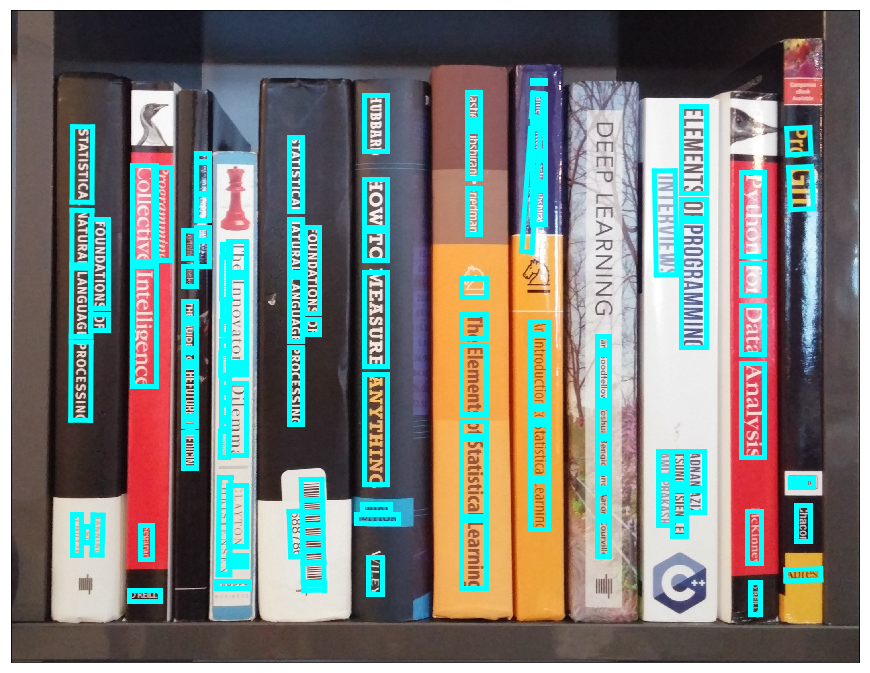

In [43]:

background_color = 'white'
special_color = [0,1,1]


# Initialize figure
fig = plt.figure(figsize = (16,12))


# Plot image
plt.imshow(img)


# Plot annotations
for i, word in enumerate(words):
    bb = word.bounding_box
    plt.plot([bb.xs[0], bb.xs[1]], [bb.ys[0], bb.ys[1]], lw = 5, c = words_color)
    plt.plot([bb.xs[1], bb.xs[2]], [bb.ys[1], bb.ys[2]], lw = 5, c = words_color)
    plt.plot([bb.xs[2], bb.xs[3]], [bb.ys[2], bb.ys[3]], lw = 5, c = words_color)
    plt.plot([bb.xs[3], bb.xs[0]], [bb.ys[3], bb.ys[0]], lw = 5, c = words_color)

    

# Cosmetics
plt.xticks([])
plt.yticks([])

plt.savefig('output/annotated.png', dpi = 300)

plt.show()

# Segmented spine and tokens

##### Imports

In [32]:
# Python standard library
import io
import re
import sys



# Scientific computing
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


# Google cloud
from google.cloud import vision
from google.cloud.vision import types


# Shelfie
sys.path.append('..')
import main

sys.path.append('../models')
import book_functions
import image_processing


##### Get data

In [26]:
img_path = main.SHELFY_BASE_PATH + '/data/shelves/insight_8/insight_8.jpg'

# Instantiates a google vision API client
client = vision.ImageAnnotatorClient()

# Loads the image into memory
with io.open(img_path, 'rb') as img_file:
    content = img_file.read()
img_bin = types.Image(content=content)

img = cv2.imread(img_path)[:,:,::-1]




# Query the image on google cloud vision API, get words
response = client.document_text_detection(image=img_bin)
texts = response.text_annotations
words = [book_functions.Word.from_google_text(text) for text in texts[1:]]


# Get image lines
lines = image_processing.get_book_lines(img)

# Get books
spines = book_functions.get_spines_from_words_lines(words, lines, yc_tolerance = 50, theta_tolerance = np.pi)

/home/prestonh/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


block!
[]
block!
['FOUNDATIONS', 'OF', 'STATISTICAL', 'NATURAL', 'LANGUAGE', 'PROCESSING', 'MANNING', 'AND', 'SCHÜTZE']
block!
['Programming', 'Collective', 'Intelligence', 'Segaran', 'OREILLY']
block!
['AN', 'AMARAAN', 'NORMANDIYA', 'MINTAA', 'MAAKONOM', 'Bertalan', 'Meskó', 'THE', 'GUIDE', 'TO', 'THEFUTURE', 'OF', 'MEDICINE']
block!
['The', 'Innovator', '’', 's', 'Dilemma', 'CLAYTON', 'M', '.', 'CHRISTENSEN', 'HARPER', 'The', 'Revolutionary', 'Book', 'That', 'Will', 'change', 'the', 'Way', 'You', 'Do', 'Business']
block!
['FOUNDATIONS', 'OF', 'STATISTICAL', 'NATURAL', 'LANGUAGE', 'PROCESSING', 'JIMIN', 'DAN', 'AM', 'AN', 'AIN', 'DAN', 'DUNIANI', ',', '688786']
block!
['HUBBARD', 'HOW', 'TO', 'MEASURE', 'ANYTHING', 'CHIEL', 'EDITION', 'WILEY']
block!
[]
block!
['Hastie', '·', 'Tibshirani', 'Friedman', 'NI', 'The', 'Elements', 'of', 'Statistical', 'Learning']
block!
['6', 'James', '·', 'Witten', '•', 'Hastie', '·', 'Tibshiran', 'James', 'Wilcidae', 'An', 'Introduction', 'to', 'Statisti

##### Make plot

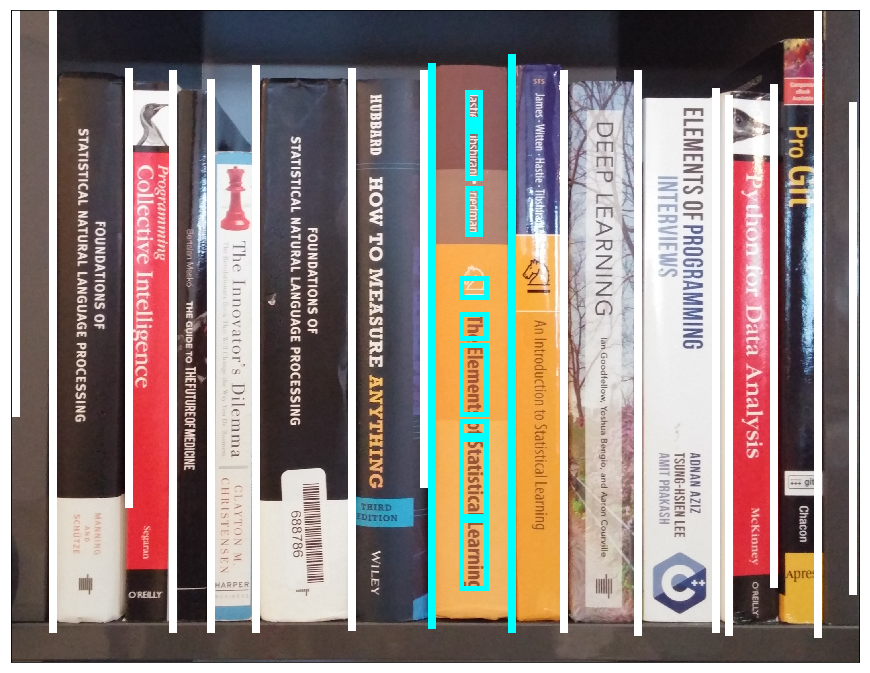

In [18]:

background_color = 'white'
special_color = [0,1,1]


# Initialize figure
fig = plt.figure(figsize = medium_figsize)


# Plot image
plt.imshow(img)


# Plot annotations
for i, spine in enumerate(spines):
    
    if i == 6:
        color = special_color
    else:
        continue
        color = background_color

    
    for word in spine.words:
        bb = word.bounding_box
        plt.plot([bb.xs[0], bb.xs[1]], [bb.ys[0], bb.ys[1]], lw = 5, c = color)
        plt.plot([bb.xs[1], bb.xs[2]], [bb.ys[1], bb.ys[2]], lw = 5, c = color)
        plt.plot([bb.xs[2], bb.xs[3]], [bb.ys[2], bb.ys[3]], lw = 5, c = color)
        plt.plot([bb.xs[3], bb.xs[0]], [bb.ys[3], bb.ys[0]], lw = 5, c = color)
    
    pass
    

# Plot spine lines
for i, line in enumerate(lines):
    if i == 8 or i == 9:
        color = special_color
    else:
        color = background_color
        
    plt.plot([line.x(line.min_y), line.x(line.max_y)], [line.min_y, line.max_y], lw = 8, color = color)


# Cosmetics
plt.xticks([])
plt.yticks([])

plt.savefig('output/annotated_segmented.png', dpi = 300)

plt.show()